# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataframes

Plant 1 is near Gandikota, Andhra Pradesh, India 

Plant 2 is near Nashik, Maharashtra, India

In [116]:
# dataframe
# p1_gen
# p1_wthr

p1_gen = pd.read_csv('../../data/Plant_1_Generation_Data.csv')
p1_wthr = pd.read_csv('../../data/Plant_1_Weather_Sensor_Data.csv')

In [117]:
print(p1_gen.shape)
p1_gen.head()

(68778, 7)


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [118]:
print(p1_wthr.shape)
p1_wthr.head()

(3182, 6)


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [119]:
# checking datatypes and nans within both dfs

p1_gen.info()

# looks like the date_tme columns isn't the correct datatype on both dfs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [120]:
p1_wthr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [121]:
# there shouldn't be any duplicates, but double checking none the less

print(p1_gen.duplicated().sum())
print(p1_wthr.duplicated().sum())

# as suspected, there are no duplicated values

0
0


In [126]:
# p1_gen: 

# converting date_time column to date_time object
p1_gen.DATE_TIME = pd.to_datetime(p1_gen.DATE_TIME, infer_datetime_format=True)
p1_gen.info()

# setting the date_time column as the index
p1_gen.set_index('DATE_TIME', inplace=True)
p1_gen.head()

p1_gen.to_csv('../../data/p1_gen_dtindex.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [127]:
# p1_wthr: 

# converting date_time column to date_time object
p1_wthr.DATE_TIME = pd.to_datetime(p1_wthr.DATE_TIME, infer_datetime_format=True)
p1_wthr.info()

# setting the date_time column as the index
p1_wthr.set_index('DATE_TIME', inplace=True)
p1_wthr.head()

p1_wthr.to_csv('../../data/p1_wthr_dtindex.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


# p1_gen df

In [23]:
# 22 inverters, therefore ea specific timestamp has 22 records for ea inverter.

len(p1_gen.SOURCE_KEY.value_counts())

22

In [129]:
print(len(p1_gen[p1_gen.index == '2020-05-15']))
p1_gen[p1_gen.index == '2020-05-15']

# 5/15 00:00:00 has 21 records

21


,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
2020-05-15,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
2020-05-15,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
2020-05-15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
2020-05-15,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0


In [136]:
# 5/16 00:00:00 has no records.
# Look into this.

print(len(p1_gen[(p1_gen.index.month == 5) & (p1_gen.index.day == 16)]))
p1_gen[(p1_gen.index.month == 5) & (p1_gen.index.day == 16)]

1934


,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-16 02:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000000,6265313.0
2020-05-16 02:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000000,6994033.0
2020-05-16 02:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000000,7609076.0
2020-05-16 02:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000000,7165435.0
2020-05-16 02:00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.000000,7212666.0
...,...,...,...,...,...,...
2020-05-16 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,6271.000000,7051339.0
2020-05-16 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,3738.857143,6795470.0
2020-05-16 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,6488.000000,7020740.0


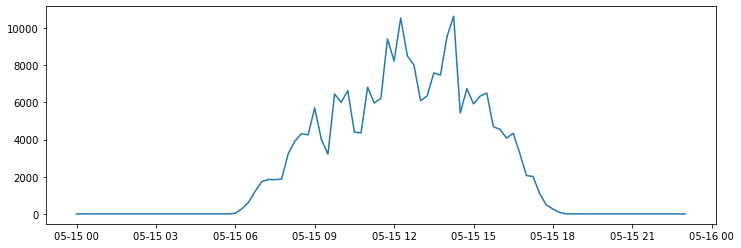

In [138]:
# isolating and plotting one inverter's dc ouput: 
# 1BY6WEcLGh8j5v7
# 5/15

sk1 = p1_gen[(p1_gen.index.month == 5) & (p1_gen.index.day == 15)
               & (p1_gen.SOURCE_KEY == '1BY6WEcLGh8j5v7')]

plt.subplots(figsize=(12,4))
plt.plot(sk1.DC_POWER);

In [ ]:
sk1.head(50)

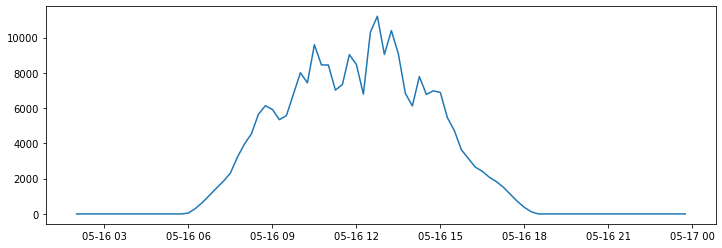

In [139]:
# isolating and plotting one inverter's dc ouput: 
# 1BY6WEcLGh8j5v7
# 5/16

sk1 = p1_gen[(p1_gen.index.month == 5) & (p1_gen.index.day == 16)
               & (p1_gen.SOURCE_KEY == '1BY6WEcLGh8j5v7')]

plt.subplots(figsize=(12,4))
plt.plot(sk1.DC_POWER);

---

In [140]:
# checking to see the dates, how many days are there. There should be 34

print('min date: ', p1_gen.index.min())
print('max date: ', p1_gen.index.max())

# umm wat? I have dates in Jan and December. Let's isolate one inverter with records in both months

min date:  2020-05-15 00:00:00
max date:  2020-06-17 23:45:00


---

Checking records/day for one inverter: 1BY6WEcLGh8j5v7
Seems like it varies

In [60]:
len(sk1[(sk1.index.day == 25) & (sk1.index.month == 5)])

93

In [61]:
len(sk1[(sk1.index.day == 26) & (sk1.index.month == 5)])

95

In [62]:
len(sk1[(sk1.index.day == 27) & (sk1.index.month == 5)])

96

In [63]:
len(sk1[(sk1.index.day == 28) & (sk1.index.month == 5)])

90

---